In [1]:
data = {}
file_path = './asset/markermapID.txt'

with open(file_path, 'r') as file:
#파일의 각 줄을 읽음
    lines = file.readlines()
    current_id = None
    for line in lines:
        line=line.strip()
        if line:
        #ArUco 마커의 ID를 읽고,
            if line.isdigit():
                current_id = line.strip()
                data[current_id] = []
            #해당 ID의 data에 points(x,y,z)를 입력함.
            else:
                points = [float(val) for val in line.split()[:3]]
                data[current_id].append(points)

In [2]:
import cv2

image_path = './images/KakaoTalk_20240530_125615705_01.jpg'

image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#'DICT_6X6_250' : ArUco 생성 시 설정하는 파라미터, 사용자의 환경에 맞게 수정가능함.
aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)
parameters = cv2.aruco.DetectorParameters_create()
#흑백영상으로부터 ArUco 마커 검출, 결과값은 ID와 각 corner 4개 점들
corners, ids, _ = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters)

In [3]:
len(corners)

11

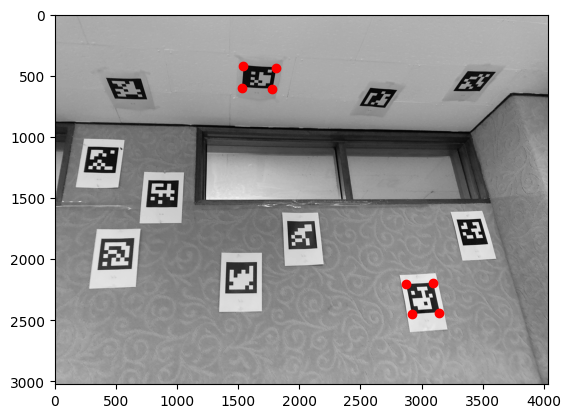

In [4]:
from matplotlib import pyplot as plt

plt.imshow(gray, cmap='gray')
plt.plot(corners[0][0][:, 0], corners[0][0][:, 1], 'ro')
plt.plot(corners[len(corners)-1][0][:, 0], corners[len(corners)-1][0][:, 1], 'ro')

In [5]:
len(corners)

11

In [6]:
len(ids)

11

In [7]:
data

{'1': [[-1.7780474013548275, -0.5911724465900646, 2.538114159560967],
  [-1.6167995200194363, -0.5876025476704967, 2.525722531509747],
  [-1.6053059325272965, -0.5597621240987823, 2.6867047324758473],
  [-1.7675475951523465, -0.5622238510981535, 2.6967577924941404]],
 '6': [[-0.7226252380666552, 0.1373691807122849, 3.0892130791345105],
  [-0.5631206110358429, 0.1405330320573944, 3.086604420825473],
  [-0.5659680213599725, 0.300476203006917, 3.0640311453438516],
  [-0.7261388641456582, 0.29693207389012743, 3.0662599876236207]],
 '7': [[-0.7524670195106614, -0.6195602434516664, 2.297376415423312],
  [-0.5919010400274396, -0.6187448844051906, 2.2918126337334934],
  [-0.5843321542216886, -0.5886409587720803, 2.4535007712913735],
  [-0.745430237334934, -0.589250295386726, 2.457878928920139]],
 '8': [[-0.4510691785365574, 0.36744341926084717, 3.0491309237523576],
  [-0.29105369353627164, 0.36708285496255644, 3.0439622161950495],
  [-0.29122848692562736, 0.5265930726090436, 3.013962988435374]

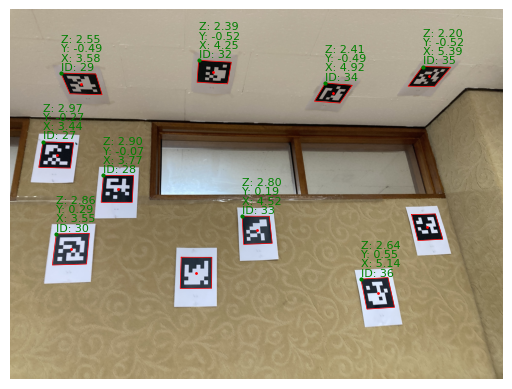

In [12]:
if len(corners) > 0:
    ids = ids.flatten()
    
    for (marker_corner, marker_id) in zip(corners, ids):
        corner = marker_corner.reshape((4, 2))
        (top_left, top_right, bottom_right, bottom_left) = corner

        top_left = (int(top_left[0]), int(top_left[1]))
        top_right = (int(top_right[0]), int(top_right[1]))
        bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
        bottom_left = (int(bottom_left[0]), int(bottom_left[1]))

        # 붉은색으로 테두리를 그림 (B, G, R)=(0, 0, 255)
        # cv2.line(image, top_left, top_right, (0, 0, 255), thickness=5)
        # cv2.line(image, top_right, bottom_right, (0, 0, 255), thickness=5)
        # cv2.line(image, bottom_right, bottom_left, (0, 0, 255), thickness=5)
        # cv2.line(image, bottom_left, top_left, (0, 0, 255), thickness=5)
        # 사각형의 좌표를 배열로 정리
        x_values = [top_left[0], top_right[0], bottom_right[0], bottom_left[0], top_left[0]]
        y_values = [top_left[1], top_right[1], bottom_right[1], bottom_left[1], top_left[1]]
        plt.plot(x_values, y_values, color='red', linewidth=0.5)


        cX = int((top_left[0] + bottom_right[0]) / 2.0)
        cY = int((top_left[1] + bottom_right[1]) / 2.0)
        # cv2.circle(image, (cX, cY), 4, (0, 0, 255), -1)
        plt.plot(cX, cY, 'ro', markersize=1)

        if str(marker_id) in data:
            (x, y, z) = data[str(marker_id)][0]
            # cv2.putText(image, f'ID: {marker_id}', (top_left[0], top_left[1] - 25), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 5)
            # cv2.putText(image, f'X: {x:.2f}', (top_left[0], top_left[1] - 100), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 5)
            # cv2.putText(image, f'Y: {y:.2f}', (top_left[0], top_left[1] - 175), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 5)
            # cv2.putText(image, f'Z: {z:.2f}', (top_left[0], top_left[1] - 250), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 255, 0), 5)

            plt.text(top_left[0], top_left[1] - 25, f'ID: {marker_id}', fontsize=8, color='green')
            plt.text(top_left[0], top_left[1] - 100, f'X: {x:.2f}', fontsize=8, color='green')
            plt.text(top_left[0], top_left[1] - 175, f'Y: {y:.2f}', fontsize=8, color='green')
            plt.text(top_left[0], top_left[1] - 250, f'Z: {z:.2f}', fontsize=8, color='green')


            plt.plot(top_left[0], top_left[1], 'go', markersize=2)

    plt.axis('off')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


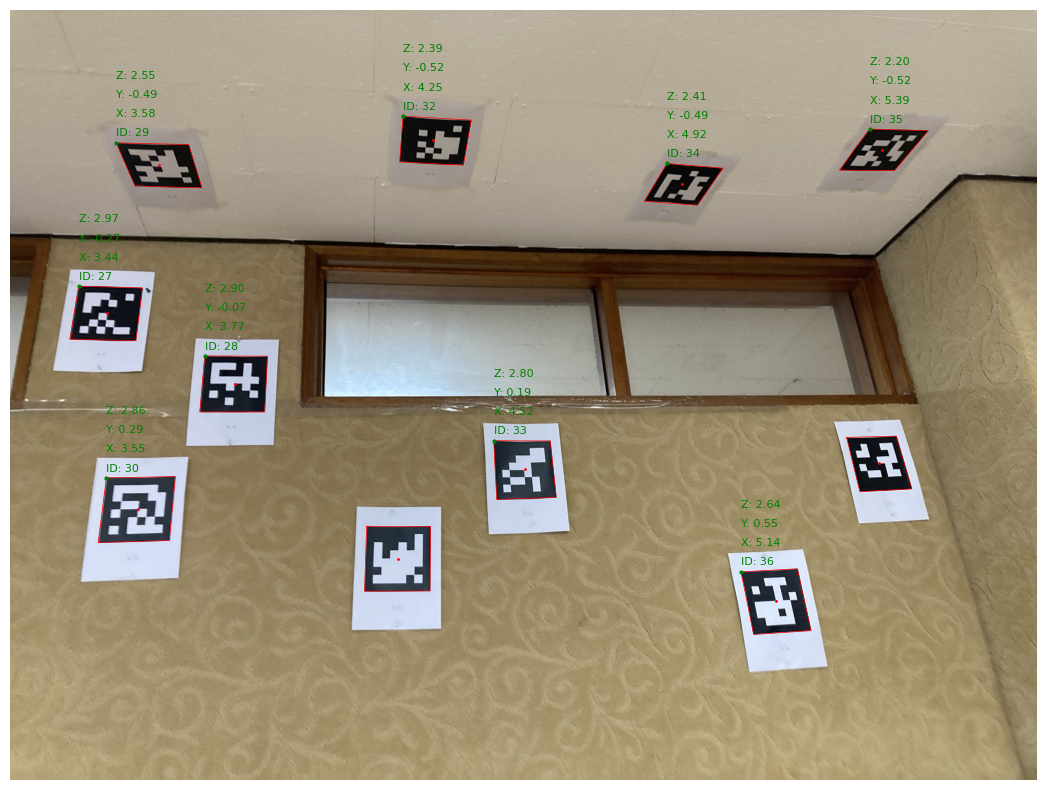

In [13]:
import cv2
from matplotlib import pyplot as plt


def read_marker_data(file_path):
    data = {}
    with open(file_path, "r") as file:
        lines = file.readlines()
        current_id = None
        for line in lines:
            line = line.strip()
            if line:
                if line.isdigit():
                    current_id = line.strip()
                    data[current_id] = []
                else:
                    points = [float(val) for val in line.split()[:3]]
                    data[current_id].append(points)
    return data


def detect_markers(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    aruco_dict = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)
    parameters = cv2.aruco.DetectorParameters_create()
    corners, ids, _ = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
    return image, corners, ids


def draw_markers(image, corners, ids, data):
    plt.figure(figsize=(12, 8))
    if len(corners) > 0:
        ids = ids.flatten()

        for marker_corner, marker_id in zip(corners, ids):
            corner = marker_corner.reshape((4, 2))
            (top_left, top_right, bottom_right, bottom_left) = corner

            top_left = (int(top_left[0]), int(top_left[1]))
            top_right = (int(top_right[0]), int(top_right[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
            bottom_left = (int(bottom_left[0]), int(bottom_left[1]))

            x_values = [
                top_left[0],
                top_right[0],
                bottom_right[0],
                bottom_left[0],
                top_left[0],
            ]
            y_values = [
                top_left[1],
                top_right[1],
                bottom_right[1],
                bottom_left[1],
                top_left[1],
            ]
            plt.plot(x_values, y_values, color="red", linewidth=0.5)

            cX = int((top_left[0] + bottom_right[0]) / 2.0)
            cY = int((top_left[1] + bottom_right[1]) / 2.0)
            plt.plot(cX, cY, "ro", markersize=1)

            if str(marker_id) in data:
                (x, y, z) = data[str(marker_id)][0]
                plt.text(
                    top_left[0],
                    top_left[1] - 25,
                    f"ID: {marker_id}",
                    fontsize=8,
                    color="green",
                )
                plt.text(
                    top_left[0],
                    top_left[1] - 100,
                    f"X: {x:.2f}",
                    fontsize=8,
                    color="green",
                )
                plt.text(
                    top_left[0],
                    top_left[1] - 175,
                    f"Y: {y:.2f}",
                    fontsize=8,
                    color="green",
                )
                plt.text(
                    top_left[0],
                    top_left[1] - 250,
                    f"Z: {z:.2f}",
                    fontsize=8,
                    color="green",
                )

                plt.plot(top_left[0], top_left[1], "go", markersize=2)

        plt.axis("off")
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.tight_layout()
    plt.show()


file_path = "./asset/markermapID.txt"
data = read_marker_data(file_path)

image_path = "./images/KakaoTalk_20240530_125615705_01.jpg"
image, corners, ids = detect_markers(image_path)
draw_markers(image, corners, ids, data)


In [14]:
import numpy as np

# path to the image files
image_file_1 = "./images/KakaoTalk_20240530_125615705_01.jpg"
image_file_2 = "./images/KakaoTalk_20240530_125615705_03.jpg"

# read world coordinates of markers
data = read_marker_data(file_path)

# detect markers in the images
image_1, corners_1, ids_1 = detect_markers(image_file_1)
image_2, corners_2, ids_2 = detect_markers(image_file_2)



In [22]:
cameraMatrix = np.array(
    [[3.28261164e3, 0, 2.02403056e3], [0, 3.28885353e3, 1.45308413e3], [0, 0, 1]]
)

In [41]:
matching_ids = []
matching_corners_1 = []
matching_corners_2 = []

for i in range(len(ids_1)):
    for j in range(len(ids_2)):
        if ids_1[i] == ids_2[j]:
            matching_ids.append(ids_1[i])
            matching_corners_1.append(corners_1[i].reshape(-1, 2))
            matching_corners_2.append(corners_2[j].reshape(-1, 2))

# Now we have the matching IDs and corresponding corner points
# You can use these lists for further processing with the 5-point algorithm

In [58]:
matching_corners_1

array([[[ 378., 1837.],
        [ 649., 1832.],
        [ 625., 2083.],
        [ 346., 2091.]],

       [[ 764., 1358.],
        [1010., 1359.],
        [1000., 1578.],
        [ 745., 1578.]],

       [[ 269., 1084.],
        [ 519., 1091.],
        [ 494., 1298.],
        [ 235., 1292.]],

       [[ 416.,  521.],
        [ 701.,  528.],
        [ 753.,  698.],
        [ 490.,  690.]]], dtype=float32)

In [57]:
matching_corners_1.reshape(-1, 2)

array([[ 378., 1837.],
       [ 649., 1832.],
       [ 625., 2083.],
       [ 346., 2091.],
       [ 764., 1358.],
       [1010., 1359.],
       [1000., 1578.],
       [ 745., 1578.],
       [ 269., 1084.],
       [ 519., 1091.],
       [ 494., 1298.],
       [ 235., 1292.],
       [ 416.,  521.],
       [ 701.,  528.],
       [ 753.,  698.],
       [ 490.,  690.]], dtype=float32)

In [51]:
matching_corners_1.shape

(4, 4, 2)

In [60]:
matching_corners_1 = np.array(matching_corners_1).reshape(-1, 2)
matching_corners_2 = np.array(matching_corners_2).reshape(-1, 2)

In [61]:
E, mask = cv2.findEssentialMat(matching_corners_1, matching_corners_2, cameraMatrix, method=cv2.RANSAC, prob=0.999, threshold=1.0)

In [62]:
_, R, t, mask = cv2.recoverPose(E, matching_corners_1, matching_corners_2, cameraMatrix)

In [63]:
print('Estimated Essential Matrix:\n', E)
print('Recovered Rotation Matrix:\n', R)
print('Recovered Translation Vector:\n', t)

Estimated Essential Matrix:
 [[ 0.03145154  0.16023849 -0.13605503]
 [ 0.08299952 -0.03045124 -0.68834779]
 [ 0.06084978  0.68512485  0.00926394]]
Recovered Rotation Matrix:
 [[ 0.93195181  0.11033684  0.34538618]
 [-0.09702269  0.99372463 -0.05565934]
 [-0.34936003  0.01836153  0.93680864]]
Recovered Translation Vector:
 [[ 0.95375412]
 [-0.19163048]
 [-0.23158334]]


In [64]:
# 번역 벡터의 방향 (크기는 상대적)
translation_direction = t / np.linalg.norm(t)
print('Translation Direction:\n', translation_direction)

Translation Direction:
 [[ 0.95375412]
 [-0.19163048]
 [-0.23158334]]
